## Prueba #0401

### "Número óptimo de clústeres para agrupamiento con K-medias"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

#### Responde la siguiente pregunta proporcionando código Python:

In [2]:
# Usaremos datos simulados.
# 3 grupos en un espacio de 8 dimensiones.
# ¡Difícil de visualizar!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Defina una función que calcule la "suma interna total de cuadrados".
- X         :   Datos.
- centers   :   Matriz que contiene las coordenadas del centroide. Calculado por kmeans.
- clusters  :   Matriz de etiquetas de clústeres. Calculado por kmeans. <br> <br>
SUGERENCIA: Implemente la fórmula de la clase teórica.

In [3]:
kmeans = KMeans(n_clusters = 3, random_state=123) #Sabemos que tenemos tres clases por el dataset, normalmente no lo tendremos
kmeans.fit(X) #Le pasamos la información

KMeans(n_clusters=3, random_state=123)

In [4]:
kmeans.labels_

array([2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0])

In [5]:
kmeans.cluster_centers_

array([[ 3.90017709, -4.49107153, -5.42803149,  0.79601424,  4.29469615,
        -1.81457648,  9.51919598,  3.41269781],
       [-0.45058073, -1.95855821, -2.81289371,  4.64334117, -1.61152497,
        -8.70234723, -2.26657376,  4.98800128],
       [-6.09715151, -6.62338226,  0.64332419,  0.51743229,  2.50758482,
         6.98957767,  4.47094678,  1.79021736]])

In [6]:
X.shape

(150, 8)

In [49]:
def total_internal_ss(X, centers, clusters):
    xm = np.mean(X)
    STC = 0
    for i in X: #Representación del sumatorio
        STC += ((i-xm)**2) #Representacion de los parentesis, siendo xm la media de X y elevandolo al cuadrado
    return STC

tss = total_internal_ss(X, kmeans.cluster_centers_, kmeans.labels_)
tss

array([3358.54444031, 4299.66791036, 2657.06879572, 1467.22816281,
       1904.82054849, 7123.90063775, 5999.42235675, 2343.97682596])

2). Visualice como un diagrama de dispersión la "suma interna total de cuadrados" vs N# de grupos. 
- Luego, determine el número óptimo de clústeres.
- ¿Es este número el mismo que se esperaba?

In [ ]:
       # <Tu código va aquí>

### A continuación muestro el proceso para llegar al código deseado
Primero de todo necesitamos calcular SSW (Suma interna total de cuadrados)

La formula es la siguiente:
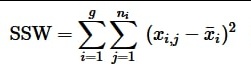

#### Pruebas con SSW

In [11]:
def total_internal_ss(X, centers, clusters):
    SSW = 0
    for label in np.unique(clusters):
        x_with_label = X[clusters == label]
        SSW += ((x_with_label - centers[label])**2)
    return SSW

tss = total_internal_ss(X, kmeans.cluster_centers_, kmeans.labels_)
tss.shape

(50, 8)

In [10]:
u_labels = np.unique(kmeans.labels_)
centroids = kmeans.cluster_centers_

for i in u_labels:
    plt.scatter(tss[label == i , 0] , tss[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'black') #Siendo s el tamaño del punto
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 50 but corresponding boolean dimension is 150

#### Intento de visualizaciones


Este es el dataset mostrado sin ver a que clase pertenece cada uno

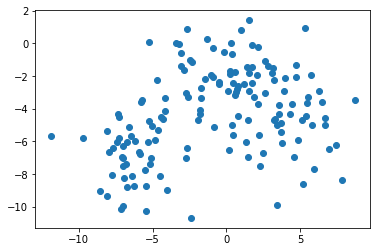

In [13]:
X_P, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
plt.figure()
plt.scatter(X_P[:,0], X_P[:,1])

Este es el dataset mostrando a que clase pertenece cada uno sin realizar aun el fit del kmeans

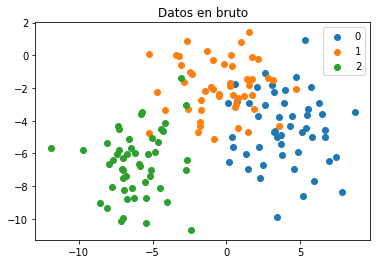

In [14]:
for i in np.unique(label):
    plt.scatter(X_P[label == i , 0] , X_P[label == i , 1] , label = i)
    
plt.title('Datos en bruto')
plt.legend()
plt.show()

Este es el dataset después de hacer el fit de kmeans

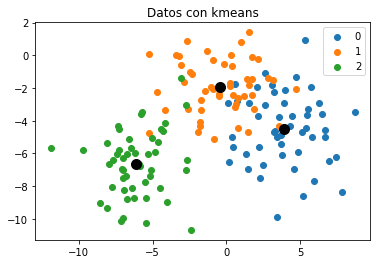

In [15]:
kmeans = KMeans(n_clusters = 3, random_state=123) #Sabemos que tenemos tres clases por el dataset, normalmente no lo tendremos
kmeans.fit(X_P) #Le pasamos la información

u_labels = np.unique(kmeans.labels_)
centroids = kmeans.cluster_centers_
label2 = kmeans.predict(X_P)

for i in u_labels:
    plt.scatter(X_P[label2 == i , 0] , X_P[label2 == i , 1] , label = i)
    
plt.title('Datos con kmeans')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'black') #Siendo s el tamaño del punto 
plt.legend()
plt.show()

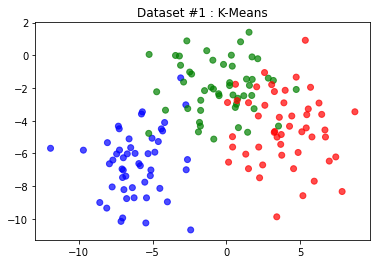

In [16]:
# Dataset #1 and three clusters.
kmeans = KMeans(n_clusters=3,random_state=123)                 # objeto kmeans para 3 clústeres. radom_state = 123 significa inicialización determinista.
kmeans.fit(X_P)                                                 # Aprendizaje no supervisado => Solo X1.
myColors = {0:'red',1:'green', 2:'blue'}  
plt.scatter(X_P[:,0],X_P[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.title('Dataset #1 : K-Means')
plt.show()